In [1]:


import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
from datetime import datetime
import os
from thermal_lib import *
from tqdm import tqdm

def plot_avg(var, isDay, draw_sub=True, draw_sem = True, draw_zero = False, ax=None, color='b'):

    if ax is None:
        fig, ax = plt.subplots(figsize=(6,4))

    if draw_zero:
        ax.axhline(0,color='k',linestyle='--')

    if draw_sub:
        for c in var.columns:
            ax.plot(var.index, var[c],color,alpha=.1)

    avg = var.mean(axis=1) 

    if draw_sem:
        sem = var.sem(axis=1) 
        ax.fill_between(var.index, avg+sem, avg-sem, alpha=.3, color=color,edgecolor='none')

    ax.plot(var.index, avg,color,alpha=1)
    xlims = [var.index[0], var.index[-1]]
    ax.set_xlim(xlims)
    ylims = ax.get_ylim()
    ax.fill_between(var.index, y1=ylims[0], y2=ylims[1], where=isDay<1,alpha=.2, color='gray',edgecolor='none')
    ax.set_ylim(ylims)
    #ax.set_xlabel('Time [Hours]')
    
%matplotlib notebook

In [2]:

#pth = r'D:\thermography\cdkl5_thermal_behaviour_group1\unico'
pth = None
sub = Subjects(pth)
print(sub)

Number of Subjects: 8

0 -> ID: WT_74 RECs: 3
1 -> ID: KO_70 RECs: 3
2 -> ID: KO_72 RECs: 3
3 -> ID: WT_79 RECs: 3
4 -> ID: KO_69 RECs: 3
5 -> ID: WT_71 RECs: 3
6 -> ID: WT_81 RECs: 3
7 -> ID: KO_75 RECs: 3



In [11]:
data_min = sub.get_data(1)

<IPython.core.display.Javascript object>


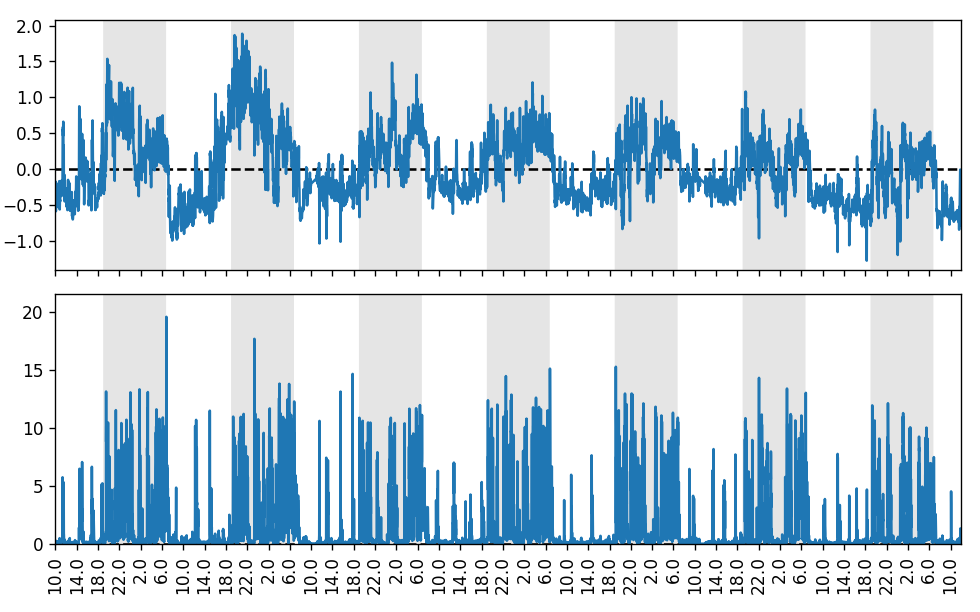

In [35]:

def plot_raw(data=None, y=None, x=None, isDay=None, ax=None, hzero=True):
    
    if ax is None:
        fig,ax = plt.subplots(figsize=(8,3))

    if x is None:
        x = data.index
    
    if hzero:
        ax.axhline(0,color='k',linestyle='--')
    
    ax.plot(x, data[y] )
    ax.set_ylim([data[y].min()*1.1, data[y].max()*1.1 ])
    ylims = ax.get_ylim()
    ax.fill_between(x, where=data['isDay']==0, 
                    y1=ylims[0], 
                    y2=ylims[1], 
                    color='gray', alpha=.2, edgecolor='None' )

    ax.set_xlim([x[0], x[-1]])
    return ax

fig,ax = plt.subplots(2,1,figsize=(8,5),sharex=True )
plot_raw(data=data_min, y='temp_rt_corrected',ax=ax[0]) 
ax[0].set_xticks(np.array(range(0,data_min.index[-1], 240)), data_min.loc[range(0,data_min.index[-1], 240),'hour'], rotation=90 )
plot_raw(data=data_min, y='distance',ax=ax[1]) 
ax[1].set_xticks(np.array(range(0,data_min.index[-1], 240)), data_min.loc[range(0,data_min.index[-1], 240),'hour'], rotation=90 )
plt.tight_layout()  





In [171]:
data_min.groupby('minute').mean()
    

,day,hour,RT,isDay,temp_avg,temp_med,temp_max,centroid_x,centroid_y,distance,temp_rt_diff,temp_norm,RT_norm,temp_rt_corrected
minute,,,,,,,,,,,,,,
0,4.0,0.0,23.515065,0.0,27.341136,27.341136,29.190096,47.875573,80.243618,5.274040,3.826071,0.671060,-0.014380,0.603750
1,4.0,0.0,23.517309,0.0,27.145917,27.145917,28.956565,49.603737,81.918128,5.469837,3.628607,0.475841,-0.012136,0.487977
2,4.0,0.0,23.508817,0.0,27.122867,27.122867,29.008354,40.718778,91.185450,4.057138,3.614050,0.452791,-0.020628,0.473419
3,4.0,0.0,23.496788,0.0,27.047563,27.047563,28.890013,40.845172,104.527219,3.342561,3.550775,0.377487,-0.032657,0.410144
4,4.0,0.0,23.537045,0.0,27.143854,27.143854,29.039260,41.317504,105.025174,3.006637,3.606809,0.473779,0.007600,0.466178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,4.0,23.0,23.530417,0.0,27.247166,27.247166,29.064760,47.134577,89.070407,3.624147,3.716749,0.577090,0.000972,0.576118
1436,4.0,23.0,23.514976,0.0,27.174499,27.174499,29.005991,45.973306,86.398108,1.634145,3.659523,0.504423,-0.014469,0.518892
1437,4.0,23.0,23.526592,0.0,27.171300,27.171300,29.090154,50.241276,91.479389,3.060623,3.644708,0.501224,-0.002853,0.504077


In [17]:
data #['minute']

,ID,Date,timeStamp,hour,minute,RT,isDay,temp_avg,temp_med,temp_max,centroid_x,centroid_y,temp_med_delta,RT_delta,start_date,day
0,1,2023-05-24 10:00:00,4.268460e+05,10,600,22.783578,1.0,25.814796,25.814796,27.876164,38.918347,62.862408,-1.056850,-0.731475,2023-05-24 10:00:00,1
1,2,2023-05-24 10:00:00,4.268462e+05,10,600,22.788317,1.0,25.857427,25.857427,27.835312,38.427321,63.172268,-1.014219,-0.726736,2023-05-24 10:00:00,1
2,3,2023-05-24 10:00:00,4.268463e+05,10,600,22.787582,1.0,25.857655,25.857655,27.862540,38.432638,63.058481,-1.013991,-0.727471,2023-05-24 10:00:00,1
3,4,2023-05-24 10:00:00,4.268464e+05,10,600,22.785784,1.0,25.708533,25.708533,27.898716,38.952989,60.202614,-1.163113,-0.729269,2023-05-24 10:00:00,1
4,5,2023-05-24 10:00:00,4.268465e+05,10,600,22.793464,1.0,25.848732,25.848732,28.327699,39.722049,56.959481,-1.022914,-0.721589,2023-05-24 10:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5187166,1492644,2023-05-31 11:59:59,1.038876e+06,11,719,24.245997,1.0,27.142662,27.142662,28.636542,39.352552,53.026672,0.092283,0.346597,2023-05-24 10:00:00,8
5187167,1492645,2023-05-31 11:59:59,1.038876e+06,11,719,24.239134,1.0,27.113983,27.113983,28.635259,39.230957,52.976179,0.063604,0.339734,2023-05-24 10:00:00,8
5187168,1492646,2023-05-31 11:59:59,1.038876e+06,11,719,24.241748,1.0,27.127716,27.127716,28.645476,39.312410,53.009184,0.077337,0.342348,2023-05-24 10:00:00,8
5187169,1492647,2023-05-31 11:59:59,1.038876e+06,11,719,24.241667,1.0,27.126335,27.126335,28.622605,39.312293,53.009062,0.075956,0.342267,2023-05-24 10:00:00,8


<IPython.core.display.Javascript object>


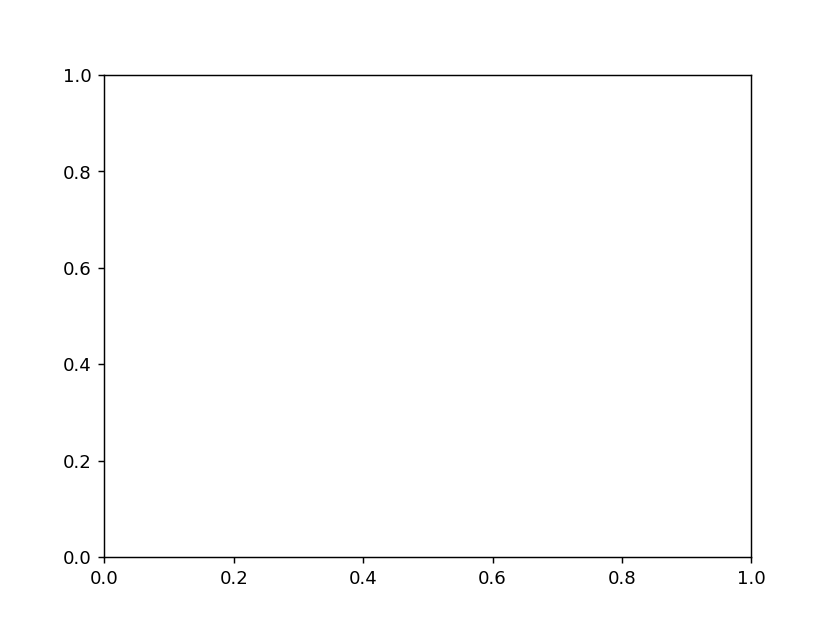

ValueError: setting an array element with a sequence.

In [24]:
fig,ax = plt.subplots()
ax.plot(temp['temp_med_delta'] )
#ax.plot(mins.diff() )

<IPython.core.display.Javascript object>


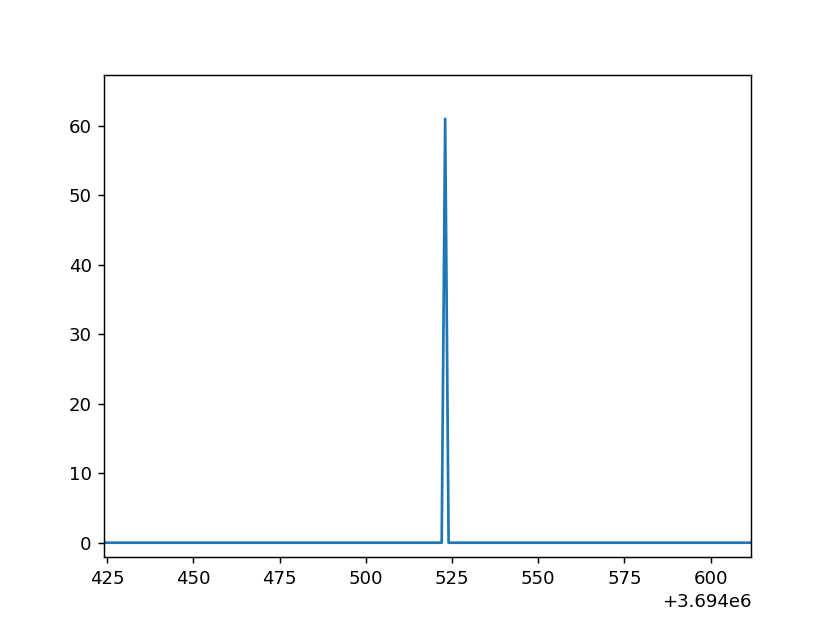

In [4]:

fig,ax = plt.subplots()
mins = data['minute']-600
ax.plot(mins.diff() ) #data['temp_med_delta'])
ax.plot(data['isDay']*600 )

In [4]:

# motion & temperature
motion = dict()
isDay = list()
temperature = dict()
for info,rec in tqdm( sub.iter_data_day(), total=len(sub) ):
    motion[(info['geno'], info['id'])] = rec['distance']
    temperature[(info['geno'], info['id'])] = rec['temp_rt_diff']
    isDay.append(rec['isDay'])
    #print(info['geno'], info['id'],len(rec['temp_rt_diff']),len(rec['isDay']))
    
isDay = pd.concat(isDay,axis=1).mean(axis=1)
motion = pd.DataFrame.from_dict(motion)
motion.index = motion.index/60
temperature = pd.DataFrame.from_dict(temperature,)
temperature.index = temperature.index/60



100%|██████████| 8/8 [00:00<00:00, 40.93it/s]


<IPython.core.display.Javascript object>


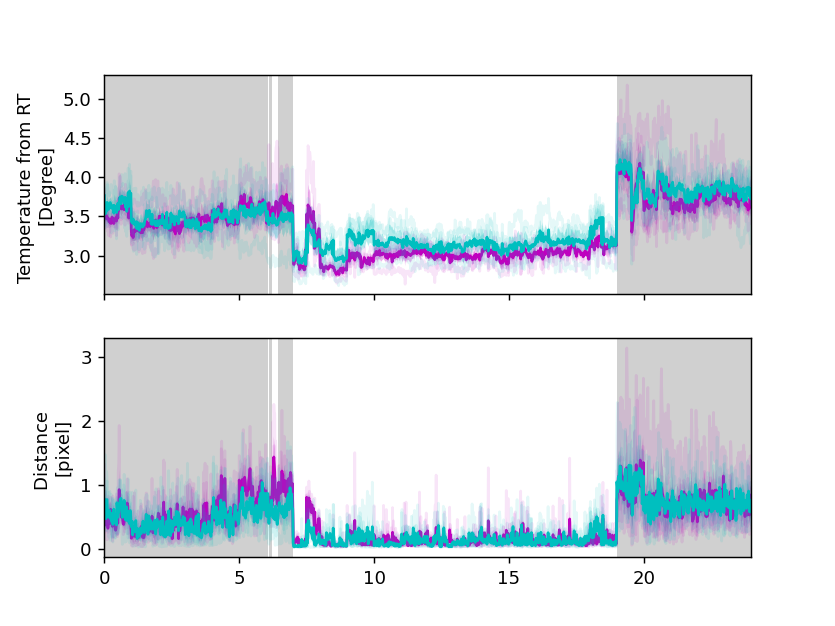

Text(0, 0.5, 'Distance \n[pixel]')

In [5]:
fig,ax = plt.subplots(2,1,sharex=True) 
plot_avg(temperature.xs('KO',level=0,axis=1), isDay,color='m',ax=ax[0])
plot_avg(temperature.xs('WT',level=0,axis=1), isDay,color='c',ax=ax[0])
ax[0].set_ylabel('Temperature from RT \n[Degree]')

plot_avg(motion.xs('KO',level=0,axis=1), isDay,color='m', ax=ax[1])
plot_avg(motion.xs('WT',level=0,axis=1), isDay,color='c', ax=ax[1])
ax[1].set_ylabel('Distance \n[pixel]')